In [1]:
import json
from os.path import isfile

hypothesis_evidence_lst=[]
with open('../data/Training_data/train.json','r') as f:
    train_json=json.load(f)
    for k in train_json:
        line=train_json[k]
#         if isfile('../data/Training_data/CT json/{}.json'.format(line['Primary_id'])):
        premises=json.load(open('../data/Training_data/CT json/{}.json'.format(line['Primary_id'])))
        hypothesis_evidence_lst.append([
            line['Statement'],
            json.dumps([premises[line['Section_id']][idx] for idx in line['Primary_evidence_index']]),
            line['Label']
        ])
        if 'Secondary_id' in line:
            premises=json.load(open('../data/Training_data/CT json/{}.json'.format(line['Secondary_id'])))
            hypothesis_evidence_lst[-1][1]=json.dumps(
                json.loads(hypothesis_evidence_lst[-1][1])+[premises[line['Section_id']][idx] for idx in line['Secondary_evidence_index']]
            )

In [2]:
len(hypothesis_evidence_lst)

1700

In [3]:
hypothesis_evidence_lst[:3]

[['All the primary trial participants do not receive any oral capecitabine, oral lapatinib ditosylate or cixutumumab IV, in conrast all the secondary trial subjects receive these.',
  '["INTERVENTION 1: ", "  Diagnostic (FLT PET)", "  Patients with early stage, ER positive primary breast cancer undergo FLT PET scan at baseline and 1-6 weeks after the start of standard endocrine treatment. The surgery follows 1-7 days after the second FLT PET scan.", "  Tracer used in the FLT PET (positron emission tomography) scanning procedure: [F18] fluorothymidine.", "  Positron Emission Tomography: Undergo FLT PET", "  Laboratory Biomarker Analysis: Correlative studies - Ki67 staining of the tumor tissue in the biopsy and surgical specimen.", "INTERVENTION 1: ", "  Arm A", "  Patients receive oral capecitabine twice daily on days 1-14 and oral lapatinib ditosylate once daily on days 1-21. Courses repeat every 21 days in the absence of disease progression or unacceptable toxicity. lapatinib ditosyla

In [4]:
import pandas as pd

train_df=pd.DataFrame(hypothesis_evidence_lst,columns=['hypothesis','evidences','label'])
train_df

,hypothesis,evidences,label
0,All the primary trial participants do not rece...,"[""INTERVENTION 1: "", "" Diagnostic (FLT PET)"",...",Contradiction
1,"Patients with Platelet count over 100,000/mm¬¨...","["" PATIENT CHARACTERISTICS:"", "" ANC 1,500/m...",Contradiction
2,Heart-related adverse events were recorded in ...,"[""Adverse Events 1:"", "" Supraventricular tach...",Entailment
3,Adult Patients with histologic confirmation of...,"[""Inclusion Criteria:"", "" Patients with histo...",Contradiction
4,Laser Therapy is in each cohort of the primary...,"[""INTERVENTION 1: "", "" Laser Therapy Alone"", ...",Contradiction
...,...,...,...
1695,"Adequate blood, kidney, and hepatic function a...","[""Inclusion Criteria:"", "" Postmenopausal wome...",Entailment
1696,The Ridaforolimus + Dalotuzumab + Exemestane g...,"[""Outcome Measurement: "", "" 1. Progression-fr...",Contradiction
1697,The only difference between the interventions ...,"[""INTERVENTION 1: "", "" Prone"", ""Prone positio...",Entailment
1698,Patients must have a white blood cell count ab...,"["" WBC > 1,500/mm\u00b3""]",Entailment


<AxesSubplot:>

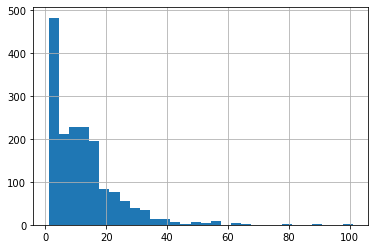

In [5]:
train_df.evidences.apply(lambda l:len(json.loads(l))).hist(bins=30)

<AxesSubplot:>

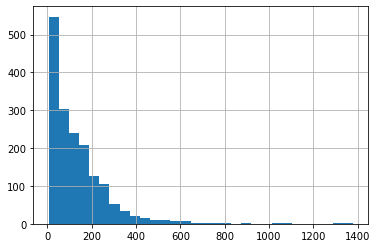

In [6]:
train_df.evidences.apply(lambda l:len(' '.join(json.loads(l)).split(' '))).hist(bins=30)

In [7]:
len(train_df.hypothesis.unique())

1692